In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data from CSV 
    Studentsperformance.csv

In [3]:
#load csv
df = pd.read_csv("StudentsPerformance.csv")
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

# Perform initial data exploration

In [5]:

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Check dataset structure, column types, and missing values
print("\nDataset Information:")
print(df.info())

# Generate summary statistics
print("\nSummary Statistics:")
print(df.describe())

First few rows of the dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 

# Perform Data Cleaning

In [7]:
# Perform Data Cleaning

# Identify missing values and handle them
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Alternatively, fill missing values with a specific value (e.g., mean)
# df.fillna(df.mean(), inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Check for duplicate records and remove if necessary
print("\nNumber of duplicate records before cleaning:")
print(df.duplicated().sum())

df = df.drop_duplicates()

print("\nNumber of duplicate records after cleaning:")
print(df.duplicated().sum())

# Standardize column names and data formats
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Example of standardizing data formats (e.g., converting date columns to datetime)
# df['date_column'] = pd.to_datetime(df['date_column'])

print("\nColumn names after standardization:")
print(df.columns)

Missing values before cleaning:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Missing values after cleaning:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Number of duplicate records before cleaning:
0

Number of duplicate records after cleaning:
0

Column names after standardization:
Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


# Conduct Exploratory Data Analysis (EDA)

In [9]:
# Calculate summary statistics for key numerical variables
print("Summary Statistics:")
print(df.describe())

# Distribution of categorical variables
print("\nDistribution of Gender:")
print(df['gender'].value_counts())

print("\nDistribution of Race/Ethnicity:")
print(df['race/ethnicity'].value_counts())

# Relationships between different features using correlation analysis
print("\nCorrelation Matrix:")
print(df[['math_score', 'reading_score', 'writing_score']].corr())

# Use Pandas groupby() and aggregation functions to summarize the dataset
print("\nAverage Scores by Gender:")
print(df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean())

Summary Statistics:
       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Distribution of Gender:
gender
female    518
male      482
Name: count, dtype: int64

Distribution of Race/Ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Correlation Matrix:
               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000

Average Scores by Gender:
        math_score  reading_score  writin

# Insights

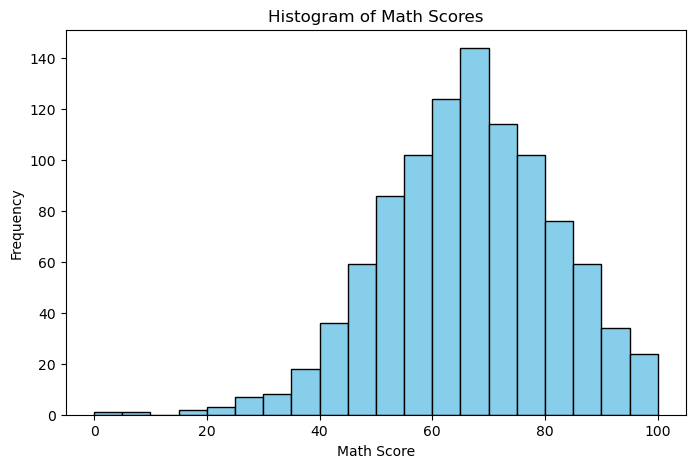

In [11]:
# 1. Histogram of a key numerical variable
plt.figure(figsize=(8, 5))
plt.hist(df['math_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

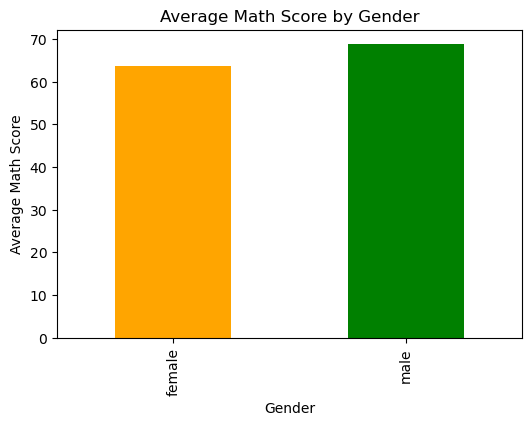

In [12]:
# 2. Bar chart of a categorical variable's aggregated value
avg_math_by_gender = df.groupby('gender')['math_score'].mean()
plt.figure(figsize=(6, 4))
avg_math_by_gender.plot(kind='bar', color=['orange', 'green'])
plt.title('Average Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Math Score')
plt.show()

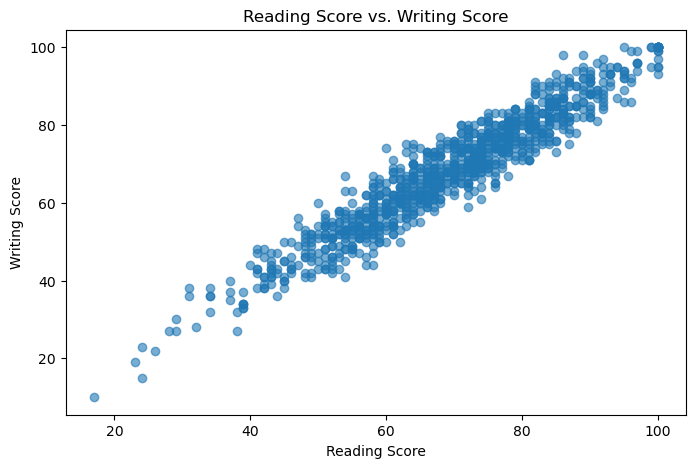

In [13]:
# 3. Scatter plot of two numerical variables
plt.figure(figsize=(8, 5))
plt.scatter(df['reading_score'], df['writing_score'], alpha=0.6)
plt.title('Reading Score vs. Writing Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

In [14]:
# Dataset Characteristics
print("Dataset Characteristics:")
print(f"Number of records: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumns in the dataset:", list(df.columns))

# Key Observations
print("\nKey Observations:")
print("\n1. Score Statistics:")
print(df[['math_score', 'reading_score', 'writing_score']].describe())

print("\n2. Gender Distribution:")
print(df['gender'].value_counts(normalize=True).round(3) * 100, "% of students")

print("\n3. Parental Education Distribution:")
print(df['parental_level_of_education'].value_counts())

print("\n4. Test Preparation Impact:")
print("\nAverage scores by test preparation:")
print(df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean())

# Identify patterns and correlations
print("\n5. Score Correlations:")
correlation_matrix = df[['math_score', 'reading_score', 'writing_score']].corr()
print(correlation_matrix)

# Identify outliers
print("\n6. Potential Outliers (scores below 20 or above 95):")
outliers = df[
    (df['math_score'] < 20) | (df['math_score'] > 95) |
    (df['reading_score'] < 20) | (df['reading_score'] > 95) |
    (df['writing_score'] < 20) | (df['writing_score'] > 95)
]
print(f"Number of outlier records: {len(outliers)}")

Dataset Characteristics:
Number of records: 1000
Number of columns: 8

Columns in the dataset: ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']

Key Observations:

1. Score Statistics:
       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

2. Gender Distribution:
gender
female    51.8
male      48.2
Name: proportion, dtype: float64 % of students

3. Parental Education Distribution:
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's